In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
rank = 4
A = np.random.randn(rank, rank)
A = np.round(A)
A = (A + A.T) / 2 # additive method!
print(A)

[[-0.  -0.5 -0.5  0. ]
 [-0.5  1.   0.   0.5]
 [-0.5  0.   0.  -0.5]
 [ 0.   0.5 -0.5 -0. ]]


In [27]:
L, V = np.linalg.eig(A)
DIAG = np.diag(L)
print(V)
print(V.T)
print(V @ V.T)
print(L)

[[ 3.25057584e-01 -5.00000000e-01  5.00000000e-01 -6.27963030e-01]
 [-8.88073834e-01 -1.62574532e-16 -1.24235182e-17 -4.59700843e-01]
 [ 3.57301767e-17  7.07106781e-01  7.07106781e-01 -2.24075910e-16]
 [-3.25057584e-01 -5.00000000e-01  5.00000000e-01  6.27963030e-01]]
[[ 3.25057584e-01 -8.88073834e-01  3.57301767e-17 -3.25057584e-01]
 [-5.00000000e-01 -1.62574532e-16  7.07106781e-01 -5.00000000e-01]
 [ 5.00000000e-01 -1.24235182e-17  7.07106781e-01  5.00000000e-01]
 [-6.27963030e-01 -4.59700843e-01 -2.24075910e-16  6.27963030e-01]]
[[ 1.00000000e+00  5.55111512e-17  1.96222539e-16 -5.55111512e-17]
 [ 5.55111512e-17  1.00000000e+00 -5.24654579e-17  2.22044605e-16]
 [ 1.96222539e-16 -5.24654579e-17  1.00000000e+00 -1.40711387e-16]
 [-5.55111512e-17  2.22044605e-16 -1.40711387e-16  1.00000000e+00]]
[ 1.3660254   0.70710678 -0.70710678 -0.3660254 ]


In [28]:
ACCRACY = np.zeros(4)

In [29]:
# Для симметричных матриц (A - симметричная): V.T @ V = I => V.T = inv(V)
RECONSTRUCTED = V @ DIAG @ V.T
print(np.sqrt(np.sum((A - RECONSTRUCTED) **2)))
ACCRACY[0] = np.sqrt(np.sum((A - RECONSTRUCTED) **2))

1.2257412387407345e-15


In [30]:
LS = np.argsort(L)
print(L)
i = LS[np.r_[np.arange(rank-2), rank-1, rank-2]][::-1]
DIAG_1 = np.diag(i)

[ 1.3660254   0.70710678 -0.70710678 -0.3660254 ]


In [31]:
DIAG_0 = np.diag(L[np.random.permutation(rank)] )
RECONSTRUCTED_0 = V @ DIAG_0 @ V.T
print(np.sqrt(np.sum((A - RECONSTRUCTED_0) **2)))
ACCRACY[1] = np.sqrt(np.sum((A - RECONSTRUCTED_0) **2))

2.722905353179412


In [32]:
RECONSTRUCTED_1 = V @ DIAG_1 @ V.T
print(np.sqrt(np.sum((A - RECONSTRUCTED_1) **2)))
ACCRACY[2] = np.sqrt(np.sum((A - RECONSTRUCTED_1) **2))

4.469305482363916


In [33]:
LS = np.argsort(L)
i = LS[np.r_[1,0,np.arange(2,rank)]][::-1]
DIAG_2 = np.diag(i)


In [34]:
RECONSTRUCTED_2 = V @ DIAG_2 @ V.T
print(np.sqrt(np.sum((A - RECONSTRUCTED_2) **2)))
ACCRACY[3] = np.sqrt(np.sum((A - RECONSTRUCTED_2) **2))

4.539864093238885


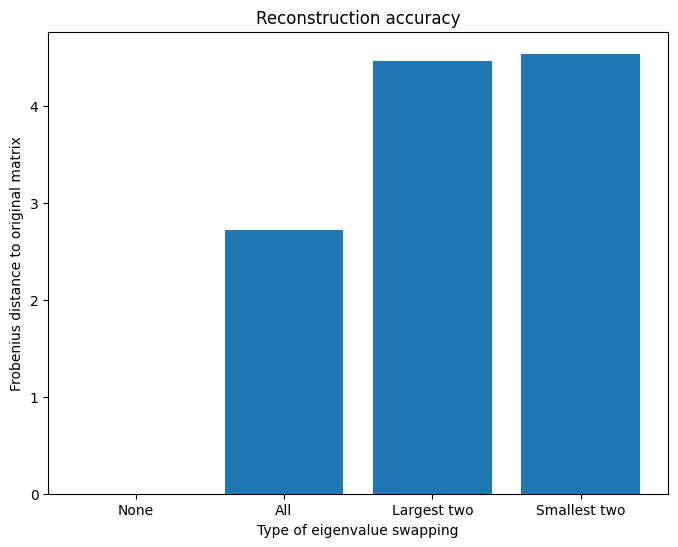

In [35]:
plt.figure(figsize=(8,6))

plt.bar(range(4),ACCRACY)
plt.xticks(range(4),labels=['None','All','Largest two','Smallest two'])
plt.ylabel('Frobenius distance to original matrix')
plt.xlabel('Type of eigenvalue swapping')
plt.title('Reconstruction accuracy')